### Performing Multiple Linear Regression

- Now we will perform a multiple linear regression analysis to predict a fan rating based on all the information collected aboutthe movie.

In [50]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,root_mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

plt.rcParams['savefig.bbox'] = "tight"
import warnings

First we proceed to load our clean dataset

In [51]:
movies = pd.read_csv(r'C:\Users\alana\Documents\TecMTY\8vo_semestre\Data_Science\movie_project\datasets\movie_DB3_clean.csv', index_col = 'Title')
movies.head()

,Genre,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4,Fans
Title,,,,,,,,,,,,
A quiet place,Horror,2018,90.0,17.0,340.939361,75.0,70.0,70.0,90.0,80.0,8.0,77.5
A quiet place Part II,Horror,2020,97.0,55.0,297.400000,72.0,70.0,80.0,40.0,60.0,6.0,69.0
Aladin (2019),Fantasy,2019,128.0,183.0,1050.693953,69.0,90.0,50.0,70.0,40.0,4.0,81.5
Alice in Wonderland,Fantasy,2010,108.0,205.0,1028.467110,64.0,80.0,40.0,60.0,50.0,7.0,78.0
American Psycho,Horror,2000,101.0,7.0,34.300000,76.0,80.0,60.0,50.0,80.0,7.0,83.5


Obtain an overall stadistic analysis

In [52]:
movies.describe()

,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4,Fans
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,2010.119760,114.922156,91.943078,469.075315,71.868263,85.808383,68.922156,67.485030,66.886228,6.874251,74.401198
std,12.244892,23.406053,69.063796,359.675748,8.393594,11.889519,17.970187,18.423354,17.177465,1.606387,14.065064
min,1942.000000,70.000000,0.636000,0.621392,51.000000,50.000000,30.000000,20.000000,30.000000,4.000000,37.000000
25%,2005.500000,97.000000,25.000000,188.160956,67.000000,80.000000,60.000000,60.000000,60.000000,6.000000,66.500000
50%,2013.000000,109.000000,85.000000,383.200000,73.000000,90.000000,70.000000,60.000000,60.000000,7.000000,76.500000
75%,2018.000000,130.000000,150.000000,701.750000,77.000000,100.000000,80.000000,80.000000,80.000000,8.000000,86.000000
max,2023.000000,180.000000,291.000000,1516.045911,92.000000,100.000000,100.000000,100.000000,100.000000,10.000000,96.000000


## Checking out the relationship between variables

First, we will study the relationship that exists between different variables. This information will help us to choose the best predictors for the model and also, to detect collinearity between predictors

In [53]:
# Calculating our correlation matrix
corr_matrix = movies.select_dtypes(include = ['float64', 'int']).corr(method = 'pearson')

# Show correlation matrix
corr_matrix

,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4,Fans
Year,1.000000,0.271848,0.240320,0.101848,-0.235057,-0.248525,-0.231292,-0.251539,-0.140845,-0.220960,-0.203538
Duration,0.271848,1.000000,0.246109,0.265925,0.314489,0.090388,0.113804,0.033490,0.138587,0.034826,0.152954
Budget,0.240320,0.246109,1.000000,0.681190,0.036448,0.168053,-0.145170,-0.052864,-0.112467,-0.044417,0.124077
Revenue,0.101848,0.265925,0.681190,1.000000,0.235804,0.210663,0.081284,0.119742,0.016870,0.106019,0.217491
Imdb,-0.235057,0.314489,0.036448,0.235804,1.000000,0.349979,0.446364,0.462201,0.523168,0.492009,0.716592
Personalrating,-0.248525,0.090388,0.168053,0.210663,0.349979,1.000000,0.139440,0.207349,0.153982,0.155175,0.310553
Critic_1,-0.231292,0.113804,-0.145170,0.081284,0.446364,0.139440,1.000000,0.412085,0.476950,0.429339,0.399988
Critic_2,-0.251539,0.033490,-0.052864,0.119742,0.462201,0.207349,0.412085,1.000000,0.369140,0.463523,0.441324
Critic_3,-0.140845,0.138587,-0.112467,0.016870,0.523168,0.153982,0.476950,0.369140,1.000000,0.483482,0.552253
Critic_4,-0.220960,0.034826,-0.044417,0.106019,0.492009,0.155175,0.429339,0.463523,0.483482,1.000000,0.478704


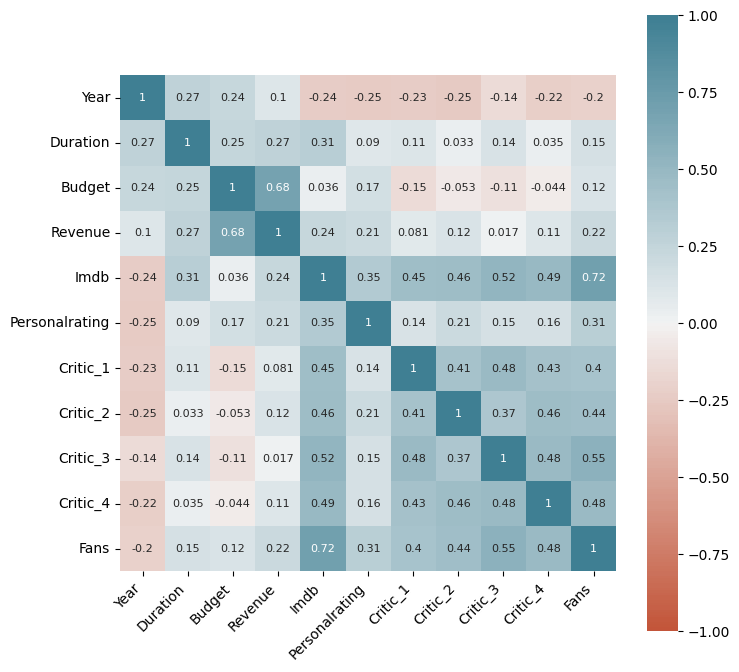

In [54]:
# Plotting our heatmap for correlation matrix
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = corr_matrix,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220,n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

To have a better understading of the distribution of the data with respect to each variable. We plot histograms to check their distributions

Text(0.5, 0.98, 'Distributions')

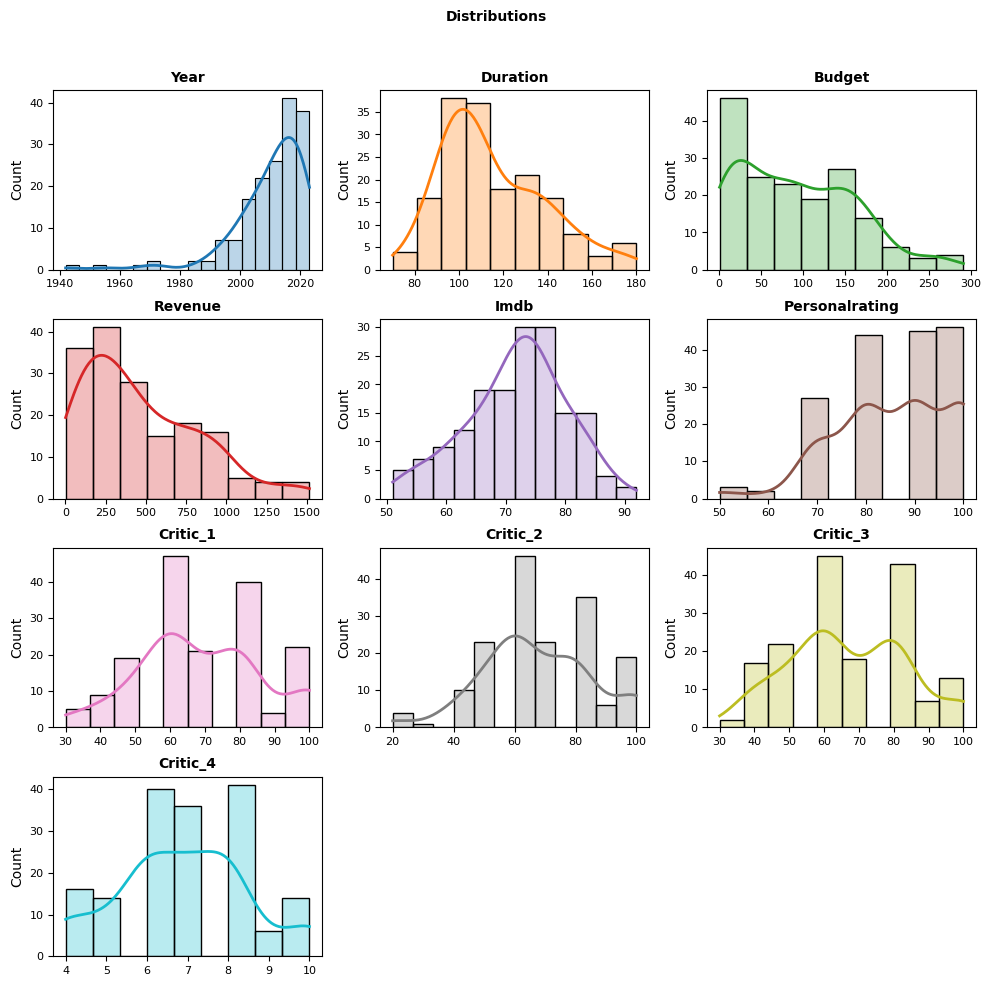

In [55]:
# Plotting the distributions for each numerical variable
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
axes = axes.flat
columnas_numeric = movies.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = movies,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


fig.delaxes(axes[10])
fig.delaxes(axes[11])
fig.tight_layout(pad=1)
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distributions', fontsize = 10, fontweight = "bold")

### Model fitting

Now, we'll fit a linear regression model with __Fans__ as the response variable while the other variables will be predictors

__Note:__ We will use Statsmodel library which provides two ways for training the model

- Giving a formula for the model and feeding it with a `DataFrame` for the training test that includes the response variable and the predictors. This is similar to the method used in **R**.

- Giving two matrices, a predictor matrix and a response matrix.

In [56]:
# Split set into training and test
X = movies.drop(columns=['Genre','Fans'])
y = movies['Fans']

In [57]:
# Checking out samples
X.head()

,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4
Title,,,,,,,,,,
A quiet place,2018,90.0,17.0,340.939361,75.0,70.0,70.0,90.0,80.0,8.0
A quiet place Part II,2020,97.0,55.0,297.400000,72.0,70.0,80.0,40.0,60.0,6.0
Aladin (2019),2019,128.0,183.0,1050.693953,69.0,90.0,50.0,70.0,40.0,4.0
Alice in Wonderland,2010,108.0,205.0,1028.467110,64.0,80.0,40.0,60.0,50.0,7.0
American Psycho,2000,101.0,7.0,34.300000,76.0,80.0,60.0,50.0,80.0,7.0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 512,
                                        shuffle      = True
                                    )

In [59]:
X.columns

Index(['Year', 'Duration', 'Budget', 'Revenue', 'Imdb', 'Personalrating',
       'Critic_1', 'Critic_2', 'Critic_3', 'Critic_4'],
      dtype='object')

# Model fitting using matrices

First, we will perform a model fitting using matrices with an intercept

In [60]:
# Model fitting using matrices
# ==============================================================================
# Add a column of 1s to the predictor matrix
X_train_int = sm.add_constant(X_train, prepend=True)

In [62]:
modelm = sm.OLS(endog=y_train, exog=X_train_int,)
modelm = modelm.fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     18.96
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.40e-20
Time:                        12:13:39   Log-Likelihood:                -478.46
No. Observations:                 133   AIC:                             978.9
Df Residuals:                     122   BIC:                             1011.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -70.5855    156.539     -0.451      0.653    -380.471     239.300
Year               0.0282      0.077      0.367      0.714      -0.124       0.181
Duration          -0.0688      0.039     -1.780      0.078      -0.145       0.008
Budget             0.0339      0.017      2.015      0.046       0.001       0.067
Revenue            0.0003      0.003      0.102      0.919      -0.006       0.007
Imdb               0.9095      0.141      6.434      0.000       0.630       1.189
Personalrating     0.0403      0.072      0.557      0.579      -0.103       0.183
Critic_1           0.0726      0.059      1.239      0.218      -0.043       0.188
Critic_2           0.0619      0.053      1.179      0.241      -0.042       0.166
Critic_3           0.1817      0.060      3.017      0.003       0.062       0.301
Critic_4           0.3940      0.638      0.618      0.538      -0.868       1.657
==============================================================================
Omnibus:                        7.218   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.252
Skew:                          -0.362   Prob(JB):                       0.0161
Kurtosis:                       3.983   Cond. No.                     4.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""